# DATOS PARA IMC

In [17]:
import pandas as pd
import seaborn as sns
#sns.set_palette("rocket")
sns.set_palette("bright")#dark bright Paired

De un archivo `.csv` que se encuentra en un link, importaremos a nuestra computadora por medio de la biblioteca `pandas` para poder analizar estos datos.

In [18]:
link = 'https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv'
df = pd.read_csv(link)

Veremos una muestra del `DataFrame`

In [19]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Veremos un histograma de cómo se distribuyen las alutras de los datos.

<Axes: xlabel='Height', ylabel='Count'>

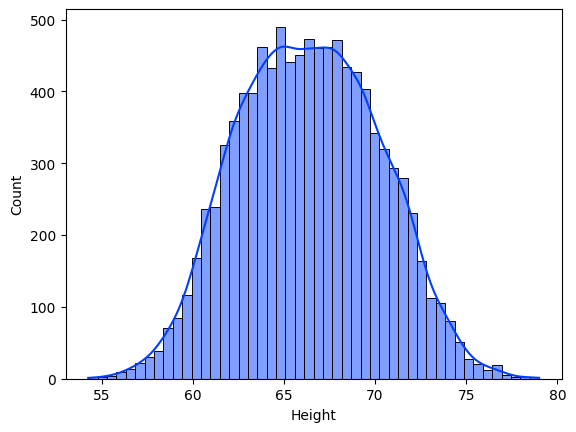

In [20]:
sns.histplot(data=df,x='Height',kde=True)

El anterior histograma fue en general, pero ¿cómo se verá si separamos por hombres y mujeres?

<Axes: xlabel='Height', ylabel='Count'>

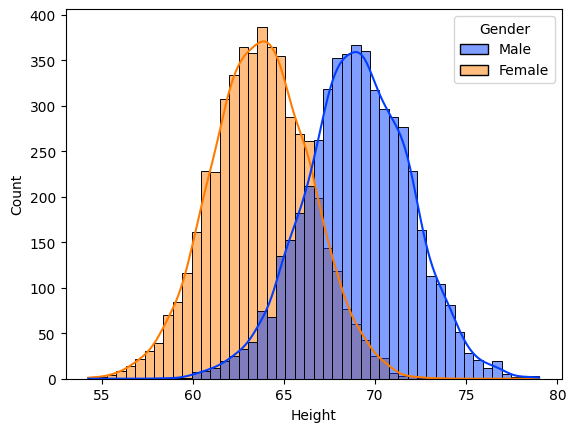

In [21]:
sns.histplot(data=df,x='Height', hue='Gender',kde=True)

In [22]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

Repetiremos la graficación de histogramas pero con el peso.

<Axes: xlabel='Weight', ylabel='Count'>

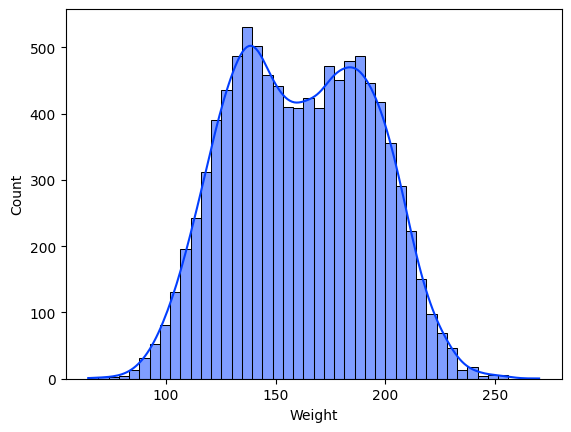

In [23]:
sns.histplot(data=df, x='Weight', kde=True)

Separando por sexo.

<Axes: xlabel='Weight', ylabel='Count'>

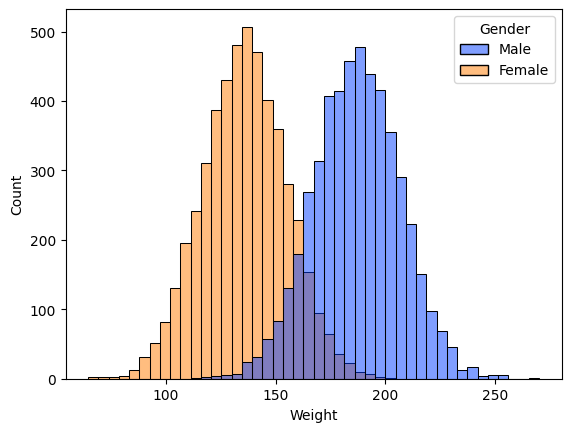

In [24]:
sns.histplot(data=df, x='Weight',hue='Gender')

Hasta ahora tenemos datos en el sistema inglés de medidas, pero si queremos obtener el IMC, debemos cambiar las medidas al sistema internacional de medidas, es decir, debemos **transformar** nuestras columnas existentes en otras nuevas.

## Sistema internacional de medidas (SI)

Para `Weight` convertiremos de Pounds a Kg.$$kg=\frac{lb}{2.2046244}$$

In [25]:
df['Weight'] = df['Weight']/(2.2046244)
df

,Gender,Height,Weight
0,Male,73.847017,109.720986
1,Male,68.781904,73.622733
2,Male,74.110105,96.497551
3,Male,71.730978,99.809505
4,Male,69.881796,93.598620
...,...,...,...
9995,Female,66.172652,62.041160
9996,Female,67.067155,77.504316
9997,Female,63.867992,58.275377
9998,Female,69.034243,74.322166


Para `Height` convertiremos Inches a metros. $$m=\frac{in}{39.37}$$

In [26]:
df['Height'] = df['Height']/39.37
df

,Gender,Height,Weight
0,Male,1.875718,109.720986
1,Male,1.747064,73.622733
2,Male,1.882400,96.497551
3,Male,1.821970,99.809505
4,Male,1.775001,93.598620
...,...,...,...
9995,Female,1.680789,62.041160
9996,Female,1.703509,77.504316
9997,Female,1.622250,58.275377
9998,Female,1.753473,74.322166


## IMC

Ya que estamos en el sistema métrico, procederemos a calcular el IMC con la fórmula $$IMC=\frac{Peso}{Estatura^2}$$

In [27]:
df['IMC'] = df['Weight']/(df['Height']**2)
df

,Gender,Height,Weight,IMC
0,Male,1.875718,109.720986,31.185637
1,Male,1.747064,73.622733,24.120948
2,Male,1.882400,96.497551,27.232798
3,Male,1.821970,99.809505,30.066939
4,Male,1.775001,93.598620,29.707914
...,...,...,...,...
9995,Female,1.680789,62.041160,21.961078
9996,Female,1.703509,77.504316,26.707729
9997,Female,1.622250,58.275377,22.143660
9998,Female,1.753473,74.322166,24.172416


Ahora obtendremos en qué tipo de peso están.

In [28]:
df["Clasif"] = df["IMC"].apply(lambda x: "Bajo" if x<18.5 else ("Normal" if x<24.9 else ("Sobrepeso" if x<29.9 else "Obesidad")))

In [29]:
df.head(10)

,Gender,Height,Weight,IMC,Clasif
0,Male,1.875718,109.720986,31.185637,Obesidad
1,Male,1.747064,73.622733,24.120948,Normal
2,Male,1.882400,96.497551,27.232798,Sobrepeso
3,Male,1.821970,99.809505,30.066939,Obesidad
4,Male,1.775001,93.598620,29.707914,Sobrepeso
5,Male,1.708230,69.042217,23.660397,Normal
6,Male,1.747145,83.428220,27.330986,Sobrepeso
7,Male,1.736056,76.190353,25.279742,Sobrepeso
8,Male,1.702285,79.800187,27.538451,Sobrepeso
9,Male,1.611798,70.941643,27.307373,Sobrepeso


Procederemos a ver el conteo de la clasificación del IMC.

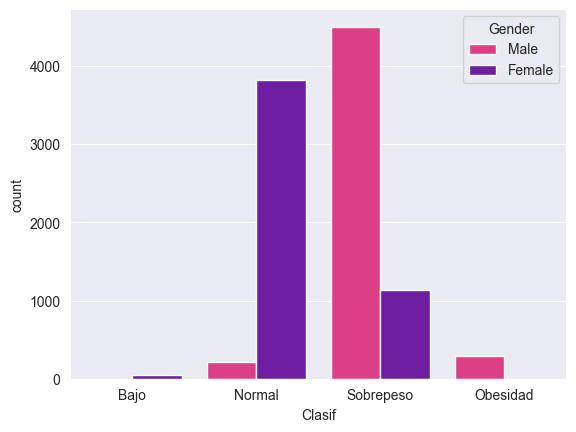

In [ ]:
palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
sns.set_palette(palette)
sns.countplot(data=df, x="Clasif", hue="Gender", order=["Bajo","Normal","Sobrepeso","Obesidad"])

Es fácil ver que en Sobrepeso y Obesidad, los hombres son los dominantes en esa clasificación. En Sobrepeso femenino apenas hay más de 1000, la mayoría de las mujeres están en Normal.
También podemos ver los datos en la siguiente gráfica.

<Axes: xlabel='Gender', ylabel='count'>

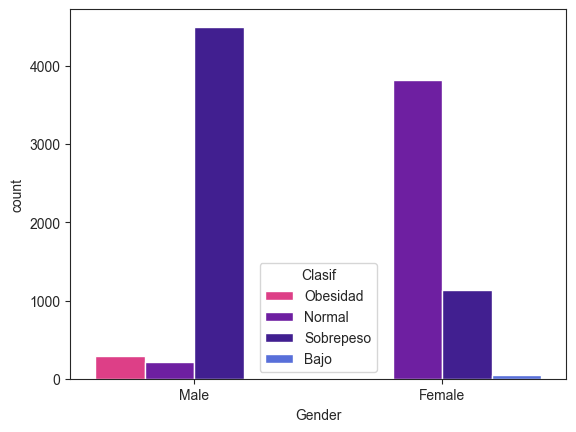

In [36]:
sns.countplot(data=df, x="Gender", hue="Clasif")

Veremos cómo se distribuyen los datos donde las covariables son `Height` y `Weight`.

<Axes: xlabel='Height', ylabel='Weight'>

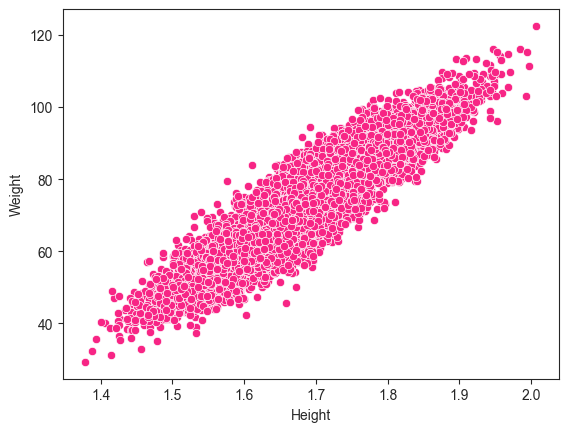

In [37]:
sns.scatterplot(data=df, x='Height', y="Weight")

Es fácil ver que hay una relación lineal entre ambas.